In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeRegressor,plot_tree
from mlxtend.plotting import plot_decision_regions


In [162]:
df= pd.read_csv(r"C:\Users\WELCOME\OneDrive\Desktop\Learning\classification__datasets\checkerboard.csv")

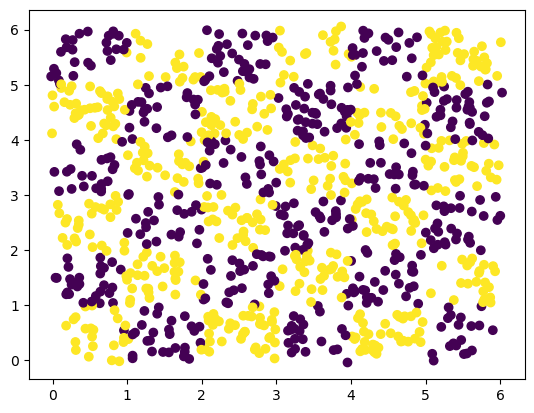

In [163]:
plt.scatter(df['x1'],df['x2'],c=df['y'])
new_df = df.iloc[:,:]

In [164]:
df.head()

,x1,x2,y
0,3.729360,1.951275,1
1,4.857506,0.389829,1
2,4.209914,1.039362,0
3,3.311072,0.528107,0
4,5.255224,2.141092,0


In [165]:
def log_odd(ones,zero):
    return np.log(ones/(zero+0.0000000000000000001))
def get_prob(log_odd):
    return 1/(1+np.exp(-log_odd))
df['pred1_log_odd'] = log_odd(len(df[df['y']==1]),len(df[df['y']==0]))

In [166]:
df['pred1_prob'] = get_prob(df['pred1_log_odd'])
df.head(2)

,x1,x2,y,pred1_log_odd,pred1_prob
0,3.729360,1.951275,1,0.068026,0.517
1,4.857506,0.389829,1,0.068026,0.517


In [167]:
df['resi_1'] = df['y'] - df['pred1_prob']
df.head(3)

,x1,x2,y,pred1_log_odd,pred1_prob,resi_1
0,3.729360,1.951275,1,0.068026,0.517,0.483
1,4.857506,0.389829,1,0.068026,0.517,0.483
2,4.209914,1.039362,0,0.068026,0.517,-0.517


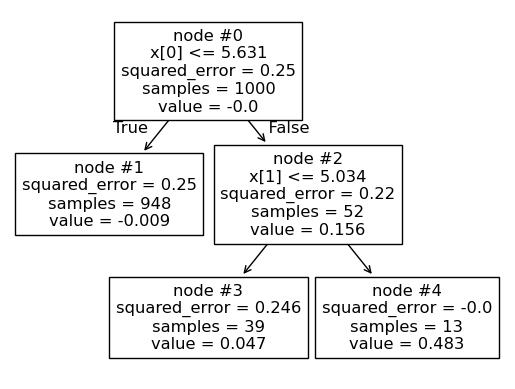

In [168]:



dt1 = DecisionTreeRegressor(max_leaf_nodes=3)
dt1.fit(df[['x1','x2']],df['resi_1'])
plot_tree(dt1,node_ids=True)
df['leaf_entry1'] = dt1.apply(df.iloc[:,:2])


In [169]:
df.head(3)

,x1,x2,y,pred1_log_odd,pred1_prob,resi_1,leaf_entry1
0,3.729360,1.951275,1,0.068026,0.517,0.483,1
1,4.857506,0.389829,1,0.068026,0.517,0.483,1
2,4.209914,1.039362,0,0.068026,0.517,-0.517,1


In [170]:
leaf_uni = df['leaf_entry1'].unique()
log_odd_with_leaf = {}
for i in leaf_uni:
    num_resi = df[df['leaf_entry1']==i]['resi_1'].sum()
    den_prob = (df[df['leaf_entry1']==i]['pred1_prob']*(1-df[df['leaf_entry1']==i]['pred1_prob'])).sum()
    log_odd_with_leaf[i] = num_resi/den_prob
# df['']
# log_odd_with_leaf
df['log_odd_with_leaf'] =[log_odd_with_leaf[i] for i in df['leaf_entry1']]
# (log_odd_with_leaf[i] for i in df['leaf_entry1'])
df
df['pred2_log_odd'] = df['pred1_log_odd'] + df['log_odd_with_leaf']
df['pred2_prob'] = get_prob(df['pred2_log_odd'])
df

,x1,x2,y,pred1_log_odd,pred1_prob,resi_1,leaf_entry1,log_odd_with_leaf,pred2_log_odd,pred2_prob
0,3.729360,1.951275,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435
1,4.857506,0.389829,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435
2,4.209914,1.039362,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435
3,3.311072,0.528107,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435
4,5.255224,2.141092,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435
...,...,...,...,...,...,...,...,...,...,...
995,1.670624,2.722207,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435
996,2.975797,0.029921,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435
997,3.464055,1.054995,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435
998,3.642952,2.328032,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435


In [171]:
df['resi_2']= df['y'] - df['pred2_prob']
df

,x1,x2,y,pred1_log_odd,pred1_prob,resi_1,leaf_entry1,log_odd_with_leaf,pred2_log_odd,pred2_prob,resi_2
0,3.729360,1.951275,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565
1,4.857506,0.389829,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565
2,4.209914,1.039362,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435
3,3.311072,0.528107,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435
4,5.255224,2.141092,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435
...,...,...,...,...,...,...,...,...,...,...,...
995,1.670624,2.722207,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435
996,2.975797,0.029921,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565
997,3.464055,1.054995,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565
998,3.642952,2.328032,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435


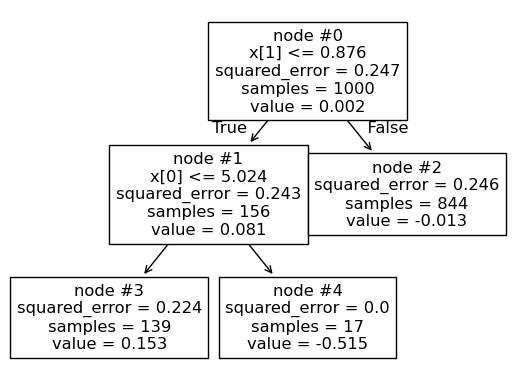

In [172]:
dt2 = DecisionTreeRegressor(max_leaf_nodes=3)
dt2.fit(df[['x1','x2']],df['resi_2'])
plot_tree(dt2,node_ids=True)
df['leaf_entry2'] = dt2.apply(df.iloc[:,:2])

In [173]:
leaf_uni = df['leaf_entry2'].unique()
log_odd_with_leaf = {}
for i in leaf_uni:
    num_resi = df[df['leaf_entry2']==i]['resi_2'].sum()
    den_prob = (df[df['leaf_entry2']==i]['pred2_prob']*(1-df[df['leaf_entry2']==i]['pred2_prob'])).sum()
    log_odd_with_leaf[i] = num_resi/den_prob
# df['']
# log_odd_with_leaf
df['log_odd_with_leaf_2'] =[log_odd_with_leaf[i] for i in df['leaf_entry2']]
# (log_odd_with_leaf[i] for i in df['leaf_entry1'])
# df
df['pred3_log_odd'] = df['pred2_log_odd'] + df['log_odd_with_leaf_2']
df['pred3_prob'] = get_prob(df['pred3_log_odd'])
df

,x1,x2,y,pred1_log_odd,pred1_prob,resi_1,leaf_entry1,log_odd_with_leaf,pred2_log_odd,pred2_prob,resi_2,leaf_entry2,log_odd_with_leaf_2,pred3_log_odd,pred3_prob
0,3.729360,1.951275,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565,2,-0.052711,-0.018969,0.495258
1,4.857506,0.389829,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565,3,0.613918,0.647660,0.656483
2,4.209914,1.039362,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435,2,-0.052711,-0.018969,0.495258
3,3.311072,0.528107,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435,3,0.613918,0.647660,0.656483
4,5.255224,2.141092,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435,2,-0.052711,-0.018969,0.495258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.670624,2.722207,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435,2,-0.052711,-0.018969,0.495258
996,2.975797,0.029921,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565,3,0.613918,0.647660,0.656483
997,3.464055,1.054995,1,0.068026,0.517,0.483,1,-0.034284,0.033742,0.508435,0.491565,2,-0.052711,-0.018969,0.495258
998,3.642952,2.328032,0,0.068026,0.517,-0.517,1,-0.034284,0.033742,0.508435,-0.508435,2,-0.052711,-0.018969,0.495258


In [174]:
y_pred = np.where(df['pred3_prob'] > .5,1,0)

In [175]:
from sklearn.metrics import accuracy_score


accuracy_score(df['y'],y_pred)

0.548

In [176]:
class GDB:
    def __init__(self,n_model = 5,learning_rate = 0.1) -> None:
        self.model = n_model
        self.Dt_model = []
        self.log_odd1= 0
        self.lr = learning_rate
        pass
    def log_odd(self,ones,zero):
        return np.log(ones/(zero+0.0000000000000000001))
    def get_prob(self,log_odd):
        return 1/(1+np.exp(-log_odd))
    def fit(self,x,y):
        self.classes_ = np.unique(y)       # <-- important for plot_decision_regions
        self.n_features_in_ = x.shape[1] 
        x = np.array(x)
        self.log_odd1 = self.log_odd(len(y[y==1]),len(y[y==0]))
        y_pred_log_odd = np.full_like(y, self.log_odd1, dtype=float)
        y_pred_prob = self.get_prob(y_pred_log_odd)
        DT = []
        for i in range(self.model):
            resi = y - y_pred_prob
            dt = DecisionTreeRegressor(max_leaf_nodes=8)
            dt.fit(x,resi)
            DT.append(dt)
            leaf_entry = dt.apply(x)
            leaf_uni = np.unique(leaf_entry)
            log_odd_with_leaf = {}
            for i in leaf_uni:
                num_resi = resi[leaf_entry==i].sum()
                den_prob = (y_pred_prob[leaf_entry==i]*(1-y_pred_prob[leaf_entry==i])).sum()
                log_odd_with_leaf[i] = num_resi/den_prob
            log_odd_with_leaf_reis =[log_odd_with_leaf[i] for i in leaf_entry]
            
            y_pred_log_odd = y_pred_log_odd + self.lr * np.array(log_odd_with_leaf_reis)
            y_pred_prob = self.get_prob(y_pred_log_odd)

        
        self.Dt_model  = DT
    def predict(self, x):
        x = np.array(x)
        log_odd = self.log_odd1
        for dt in self.Dt_model:
            log_odd += self.lr * dt.predict(x)
        return np.where(self.get_prob(log_odd) > 0.5,1,0)
    

In [182]:
from sklearn.model_selection import train_test_split


gd = GDB(n_model=188)
x = np.array(new_df.iloc[:,:2])
y = np.array(new_df.iloc[:,-1])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [183]:
gd.fit(x_train,y_train)

In [184]:
y_pred = gd.predict(x_test)

In [185]:
accuracy_score(y_test,y_pred)

0.79

<Axes: >

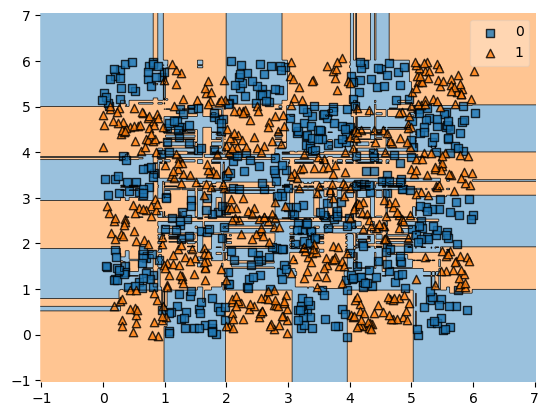

In [189]:
plot_decision_regions(x,y,gd)
